# House Prices - Advanced Regression Techniques
(Preços de casas - Técnicas Avançadas de Regressão)

<img src="https://github.com/lucaslealx/HousePrices/blob/main/img/img1.png?raw=true" width=800>


- Vamos utilizar o [dataset disponível no Kaggle](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/overview)
    - É um dataset de **competição**
    - Temos uma base com a **descrição de cada uma das colunas (data_description.txt)**

In [2]:
# Importando as bases
import pandas as pd
treino = pd.read_csv('../dados/train_3.csv')
teste = pd.read_csv('../dados/test_3.csv')

In [3]:
# Verificando o formato da base
treino.shape

(1460, 148)

In [4]:
# Verificando o tipo de dados nas colunas
treino.dtypes.value_counts()

int64      131
float64     17
Name: count, dtype: int64

## Criando nosso modelo

- **Vamos separar em treino e teste**
    - https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [7]:
# Selecionando X e y
X = treino.drop('SalePrice',axis=1)
y = treino.SalePrice

In [8]:
# Importando o train_test_split
from sklearn.model_selection import train_test_split

In [9]:
# Separando essa base em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

- **Vamos então adicionar novos algoritmos nessa análise:**
    - RandomForestRegressor
        - https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html#sklearn.ensemble.RandomForestRegressor
    - XGBoost
        - https://xgboost.readthedocs.io/en/stable/index.html

- Agora vamos usar o **grid_search** para estimar os melhores parâmetros
    - https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

In [12]:
import warnings
warnings.filterwarnings('ignore')

In [13]:
# Para o RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor(random_state=42)
parametros_rf = {
    'n_estimators': [100,200,500],
    'criterion': ['squared_error','poisson'],
    'max_depth': [10,20,30,40,50],
    'max_features': ['auto', 'sqrt']
}

In [14]:
# Fazendo o grid search
from sklearn.model_selection import GridSearchCV
grid_search_rf = GridSearchCV(estimator=reg_rf,param_grid=parametros_rf,scoring='neg_mean_squared_error')
grid_search_rf = grid_search_rf.fit(X_train,y_train)

In [15]:
# Verificando os melhores parâmetros para o RandomForest
grid_search_rf.best_params_

{'criterion': 'squared_error',
 'max_depth': 40,
 'max_features': 'sqrt',
 'n_estimators': 500}

In [16]:
# E o melhor score
grid_search_rf.best_score_*(-1)

np.float64(904330738.0951769)

In [43]:
# Para o XGBoost
from xgboost import XGBRegressor
reg_xgb = XGBRegressor(random_state=42)
parametros_xgb = {
    'learning_rate': [0.05, 0.1, 0.15],
    'max_depth': [15,20,25],
    'n_estimators': [90, 100, 110],
    'colsample_bytree': [0.7, 1]
}

In [45]:
# Também fazendo o grid search
grid_search_xgb = GridSearchCV(estimator=reg_xgb,param_grid=parametros_xgb,scoring='neg_mean_squared_error')
grid_search_xgb = grid_search_xgb.fit(X_train,y_train)

In [49]:
# Verificando os melhores parâmetros
grid_search_xgb.best_params_

{'colsample_bytree': 0.7,
 'learning_rate': 0.05,
 'max_depth': 20,
 'n_estimators': 110}

In [50]:
# E o melhor score
grid_search_xgb.best_score_*(-1)

np.float64(1049489664.0)

- **Selecionando o melhor estimados para os dois algoritmos**

In [52]:
# Para o Random Forest
reg_rf_best = grid_search_rf.best_estimator_

In [53]:
# Para o XGBoost
reg_xgb_best = grid_search_xgb.best_estimator_

- **Fazendo a previsão no X_test**

In [55]:
# RandomForest
y_pred_rf = reg_rf_best.predict(X_test)

In [56]:
# XGBoost
y_pred_xgb = reg_xgb_best.predict(X_test)

- **E avaliar esses dados, utilizando tanto o erro absoluto quanto o quadrático:**
    - Erro médio absoluto
        - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_absolute_error.html
    - Erro quadrático médio
        - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html

In [58]:
# Importando o erro médio absoluto
from sklearn.metrics import mean_absolute_error

In [59]:
# E o erro quadrático médio
from sklearn.metrics import mean_squared_error

In [60]:
# do Random Forest
print(mean_absolute_error(y_test, y_pred_rf))
print(mean_squared_error(y_test, y_pred_rf))

17526.515069156292
1080162332.6163082


In [61]:
# e do xgb
print(mean_absolute_error(y_test, y_pred_xgb))
print(mean_squared_error(y_test, y_pred_xgb))

17320.990234375
1104212608.0


- **Podemos plotar visualmente a relação do y_test com as previsões feitas**
    - Para isso vamos utilizar o matplotlib
        - https://matplotlib.org/

In [63]:
# Importando o matplotlib
import matplotlib.pyplot as plt

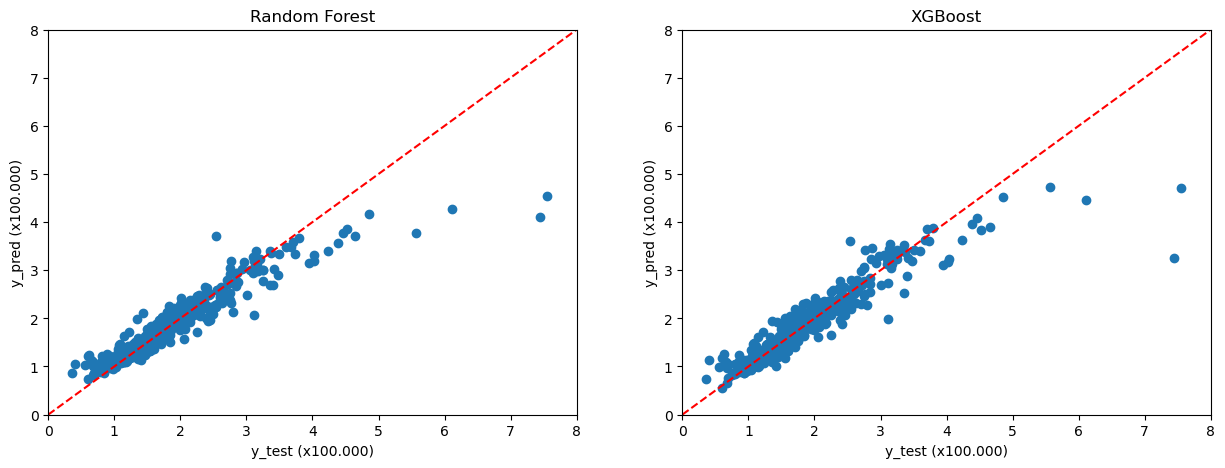

In [64]:
# Criando esse gráfico
fig, ax = plt.subplots(ncols=2,figsize=(15,5))

ax[0].scatter(y_test/100000, y_pred_rf/100000)
ax[0].plot([0,8],[0,8],'--r')
ax[1].scatter(y_test/100000, y_pred_xgb/100000)
ax[1].plot([0,8],[0,8],'--r')

ax[0].set(xlim=(0, 8),ylim=(0, 8))
ax[0].set_xlabel('y_test (x100.000)')
ax[0].set_ylabel('y_pred (x100.000)')
ax[0].set_title('Random Forest')
ax[1].set(xlim=(0, 8),ylim=(0, 8))
ax[1].set_xlabel('y_test (x100.000)')
ax[1].set_ylabel('y_pred (x100.000)')
ax[1].set_title('XGBoost')

plt.show()

## Fazendo a previsão para a base de teste da competição

In [66]:
# Visualizando a base
teste.head(3)

,Id,MSSubClass,LotFrontage,LotArea,LotShape,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,...,Fence_MnPrv,Fence_infrequent_sklearn,MiscFeature_infrequent_sklearn,SaleType_New,SaleType_WD,SaleType_infrequent_sklearn,SaleCondition_Abnorml,SaleCondition_Normal,SaleCondition_Partial,SaleCondition_infrequent_sklearn
0,1461,20,80.0,11622,3,0,5,6,1961,1961,...,1,0,0,0,1,0,0,1,0,0
1,1462,20,81.0,14267,2,0,6,6,1958,1958,...,0,0,1,0,1,0,0,1,0,0
2,1463,60,74.0,13830,2,0,5,5,1997,1998,...,1,0,0,0,1,0,0,1,0,0


In [67]:
# Vamos usar a Regressão Linear para fazer a previsão
y_pred = reg_rf_best.predict(teste)

In [68]:
# Podemos adicionar essa coluna de previsão na nossa base
teste['SalePrice'] = y_pred

In [69]:
# E extrair somente o Id e o SalePrice
base_kaggle = teste[['Id','SalePrice']]
base_kaggle.head(3)

,Id,SalePrice
0,1461,123391.700
1,1462,155676.652
2,1463,186959.218


In [70]:
# Podemos então exportar essa base
base_kaggle.to_csv('../dados/05_resultado_projeto_rf.csv',index=False)

- Podemos tentar fazer a previsão com o XGBoost

In [72]:
# Visualizando novamente a base de teste
teste.head(3)

,Id,MSSubClass,LotFrontage,LotArea,LotShape,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,...,Fence_infrequent_sklearn,MiscFeature_infrequent_sklearn,SaleType_New,SaleType_WD,SaleType_infrequent_sklearn,SaleCondition_Abnorml,SaleCondition_Normal,SaleCondition_Partial,SaleCondition_infrequent_sklearn,SalePrice
0,1461,20,80.0,11622,3,0,5,6,1961,1961,...,0,0,0,1,0,0,1,0,0,123391.700
1,1462,20,81.0,14267,2,0,6,6,1958,1958,...,0,1,0,1,0,0,1,0,0,155676.652
2,1463,60,74.0,13830,2,0,5,5,1997,1998,...,0,0,0,1,0,0,1,0,0,186959.218


In [73]:
# Retirando a coluna SalePrice
teste = teste.drop('SalePrice',axis=1)

In [74]:
# Usando o XGBoost para fazer a regressão
y_pred = reg_xgb_best.predict(teste)

In [75]:
# Podemos novamente adicionar a coluna na base
teste['SalePrice'] = y_pred

In [76]:
# E extrair somente o Id e o SalePrice
base_kaggle = teste[['Id','SalePrice']]
base_kaggle.head(3)

,Id,SalePrice
0,1461,128831.484375
1,1462,154684.781250
2,1463,187351.125000


In [77]:
# E exportar a nova base
base_kaggle.to_csv('../dados/05_resultado_projeto.csv',index=False)